In [8]:
import networkx as nx
import matplotlib.pyplot as plt

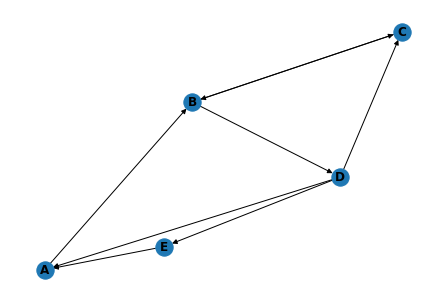

In [9]:
G = nx.DiGraph()

G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")
G.add_node("E")

G.add_edge("D","C")
G.add_edge("D","A")
G.add_edge("D","E")
G.add_edge("C","B")
G.add_edge("A","B")
G.add_edge("E","A")
G.add_edge("B","C")
G.add_edge("B","D")

nx.draw(G,with_labels=True, font_weight='bold')
plt.show()

In [10]:
import numpy as np

def flip(p):
    return np.random.random() < p

In [11]:
from collections import Counter

def random_walk(G, alpha=0.85, iters=1000):
    counter = Counter()
    node = next(iter(G))
    
    for _ in range(iters):
        if flip(alpha):
            node = np.random.choice(list(G[node]))
        else:
            node = np.random.choice(list(G))
        
        counter[node] += 1
        
    total = sum(counter.values())
    for key in counter:
        counter[key] /= total
    return counter

In [12]:
ranks_rw = random_walk(G)
ranks_rw

Counter({'B': 0.353, 'D': 0.19, 'A': 0.146, 'E': 0.077, 'C': 0.234})

In [1]:
!pip install --upgrade scipy networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached networkx-3.0-py3-none-any.whl (2.0 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3


In [13]:
!pip install 'networkx<2.7'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
ranks_pr = nx.pagerank(G)
ranks_pr

{'A': 0.15035141786968964,
 'B': 0.35519316255962585,
 'C': 0.2322277097853423,
 'D': 0.18095642215666966,
 'E': 0.08127128762867264}

In [15]:
import pandas as pd

s1 = pd.Series(ranks_pr)
s2 = pd.Series(ranks_rw)

df = pd.DataFrame(dict(PageRank=s1, RandomWalk=s2))
df['Diff'] = df['RandomWalk'] - df['PageRank']
df*100

,PageRank,RandomWalk,Diff
A,15.035142,14.6,-0.435142
B,35.519316,35.3,-0.219316
C,23.222771,23.4,0.177229
D,18.095642,19.0,0.904358
E,8.127129,7.7,-0.427129
